# ДЗ 2 Продуктова Анл=алитика
# Выполнил: Волков Андрей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


In [2]:
# Load the data from exel
data = pd.read_excel('dz4.xlsx')

# 2.1 Проверить, что распределение p-value на А/А-тестах для среднего чека (глобальное среднее) в по-юзерном тесте далеко не идеально в t-критерии

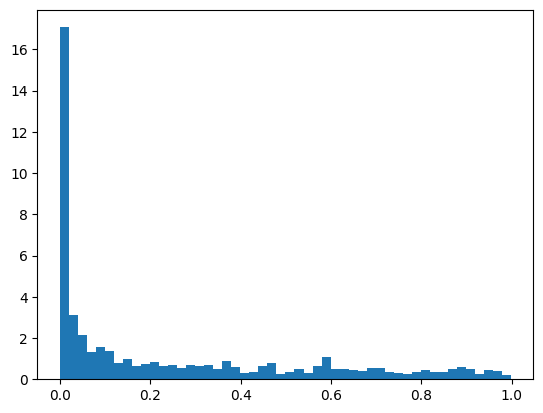

In [3]:
users_df = data.groupby('user_id').agg({'cheks': 'mean'}).reset_index()


p_values = []
for i in range(1000):
    users_a = users_df.sample(frac=0.5)['user_id']
    users_b = users_df[~users_df['user_id'].isin(users_a)]['user_id']

    group_A = data[data['user_id'].isin(users_a)]['cheks']
    group_B = data[data['user_id'].isin(users_b)]['cheks']

    p_value = stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p_value)

# построим гистограмму плостности распределения p-value
plt.hist(p_values, bins=50, density=True)
plt.show()



### Вывод:
поюзреное распределение p-value не идеально, и не соответствует равномерному распределению, что говорит о том, t-тест не применим

# 2.2 Проверить через распределение p-value на А/А-тестах, работает ли дельта-метод для глобального среднего чека

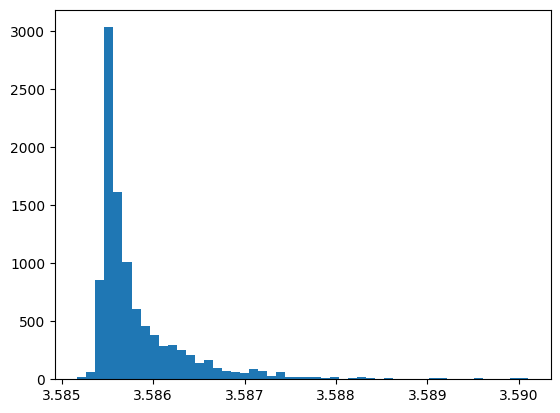

In [4]:
# дельта метод
p_values = []
for i in range(1000):
    x = data.sample(frac=0.5)['cheks']
    y = data[~data.index.isin(x.index)]['cheks']
    mean_x = x.mean()
    mean_y = y.mean()
    std_x = x.std()
    std_y = y.std()
    # точечная оценка
    delta = mean_x / mean_y
    # оценка дисперсии
    delta_var = delta**2 * (std_x**2 / mean_x**2 + std_y**2 / mean_y**2)
    # доверительный интервал
    delta_std = np.sqrt(delta_var)
    p_values.append(delta / delta_std)

plt.hist(p_values, bins=50, density=True)
plt.show()


# 2.3 Проверить аналогично прошлым пунктам применимость t-критерия для нормализированного (двойного) среднего чека

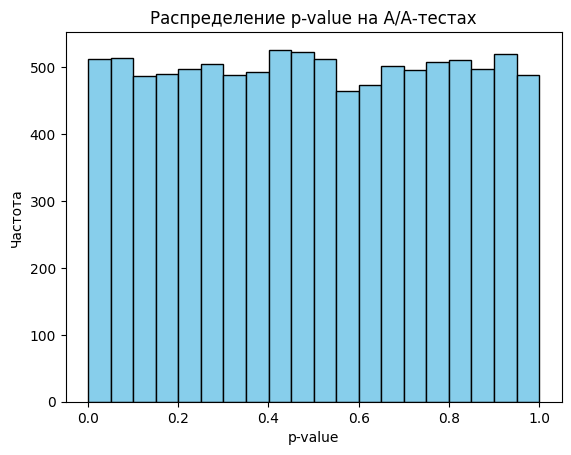

In [38]:
num_tests = 10000

# Список для хранения p-value
p_values = []

# Выполним серию А/А-тестов
for _ in range(num_tests):
    # Разделим данные на две случайные группы A и B
    group_A = users_df.sample(frac=0.5)
    group_B = users_df.drop(group_A.index)
    
    # Выполним t-тест
    t_stat, p_value = stats.ttest_ind(group_A['cheks'], group_B['cheks'])
    p_values.append(p_value)

# Построим гистограмму распределения p-value
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение p-value на А/А-тестах')
plt.xlabel('p-value')
plt.ylabel('Частота')
plt.show()

### Вывод: распределение равномерное значит t-test для нормализированного среднего чека применим

# 2.4 Сделать симуляции А/А-тестов таком образом: сгенерировать эффект таргетной группы так, чтобы среднее у него было 0 и ненулевая дисперсия. Проверить, что t-критерий дает нормальное распределение p-value

Text(0.5, 0, 'p-value')

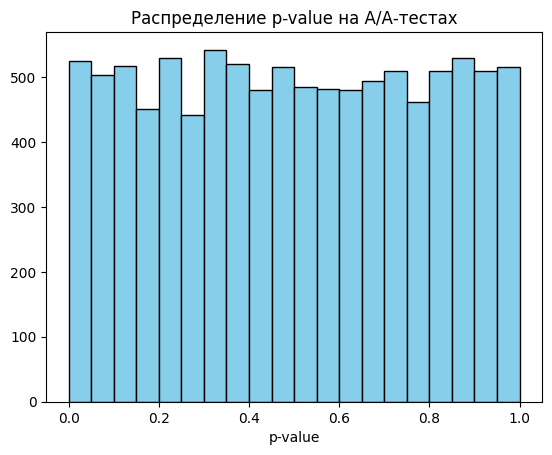

In [43]:
# Сделать симуляции А/А-тестов таком образом: сгенерировать эффект таргетной группы так, чтобы среднее у него было 0 и ненулевая дисперсия. Проверить, что t-критерий дает нормальное распределение p-value
num_tests = 10000
p_values = []

for _ in range(num_tests):
    group_A = data.sample(frac=0.5)['cheks']
    group_B = data.drop(group_A.index)['cheks']

    # Добавим случайный эффект к группе B
    group_B = group_B + np.random.normal(0, 1, len(group_B))
    
    # Выполним t-тест
    t_stat, p_value = stats.ttest_ind(group_A, group_B)
    p_values.append(p_value)

# Построим гистограмму распределения p-value
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение p-value на А/А-тестах')
plt.xlabel('p-value')

### Вывод: t-тест дает нормальное распределение p-value

# 2.5 Сгенерировать эффект для таргетной группы так, чтобы среднее у него было 0 и не-нулевая дисперсия, но при этом средний эффект на пользователя был  скоррелирован с кол-вом заказов. Проверить, работает ли t-тест для нормализованного среднего# 

Text(0.5, 0, 'p-value')

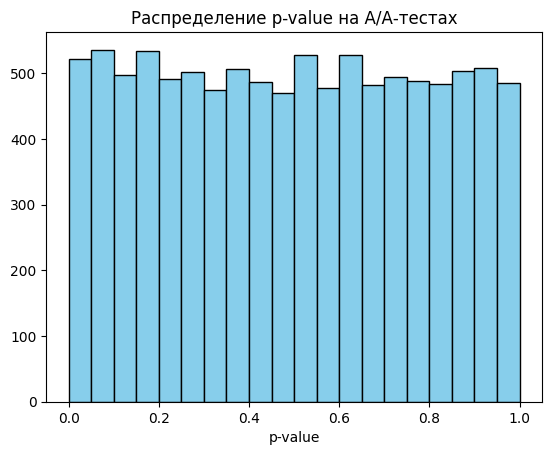

In [49]:
# сгенерить эффект для таргетной группы так, чтобы среднее у него было 0 и не-нулевая дисперсия, но при этом средний эффект на пользователя был  скоррелирован с кол-вом заказов. Проверить, работает ли t-тест для нормализованного среднего
num_tests = 10000
p_values = []

count_cheks_by_user = data.groupby('user_id').agg({'cheks': 'count'}).reset_index()

for _ in range(num_tests):
    group_A = users_df.sample(frac=0.5)
    group_B = users_df.drop(group_A.index)
    
    # Добавим коррелированный эффект к группе B
    group_B['cheks'] = group_B['cheks'] + np.random.normal(0, 1, len(group_B)) * count_cheks_by_user[count_cheks_by_user['user_id'].isin(group_B['user_id'])]['cheks'].values
    
    # # посчитаем корреляцию между средним эффектом и количеством заказов
    # corr = np.corrcoef(group_B['cheks'], count_cheks_by_user[count_cheks_by_user['user_id'].isin(group_B['user_id'])]['cheks'].values)[0, 1]
    # print(corr)

    # Выполним t-тест
    t_stat, p_value = stats.ttest_ind(group_A['cheks'], group_B['cheks'])
    p_values.append(p_value)

# Построим гистограмму распределения p-value
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение p-value на А/А-тестах')
plt.xlabel('p-value')
    

### Вывод: t-тест работает для нормализованного среднего